In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string


In [3]:
df = pd.read_csv("spam.csv")
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


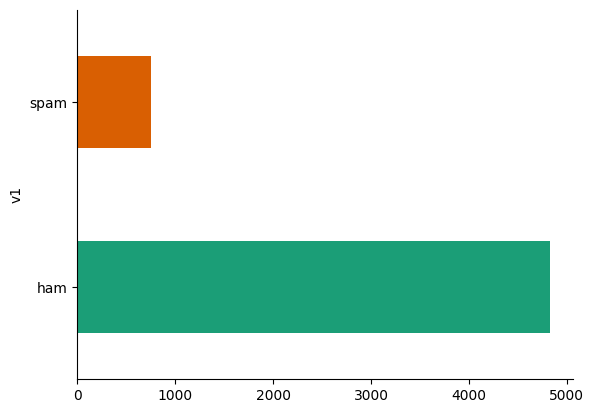

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

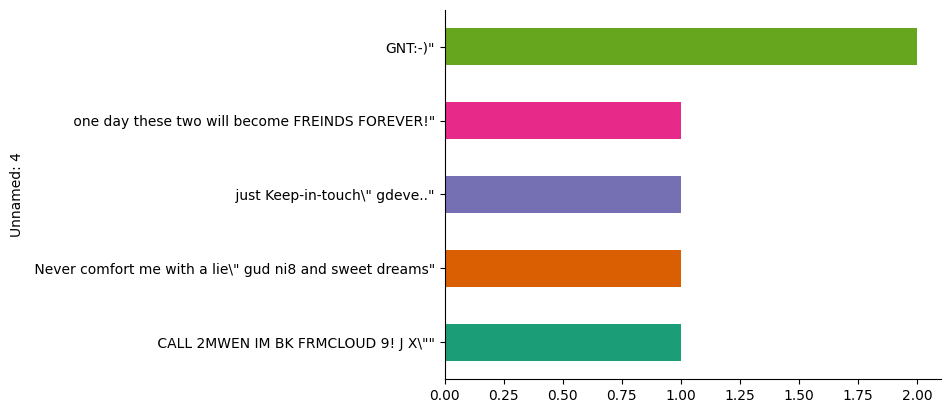

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Unnamed: 4').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)
df.sample(2)

,v1,v2
2357,ham,Okay same with me. Well thanks for the clarifi...
1006,spam,Panasonic & BluetoothHdset FREE. Nokia FREE. M...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [14]:
df["v1"] = encoder.fit_transform(df["v1"])
df.sample(2)

,v1,v2
1657,0,S:-)if we have one good partnership going we w...
5302,0,About &lt;#&gt; bucks. The banks fees are fix...


([<matplotlib.patches.Wedge at 0x7877764ea5f0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.594'),
  Text(0.5475662602592474, -0.2452981667801496, '13.406')])

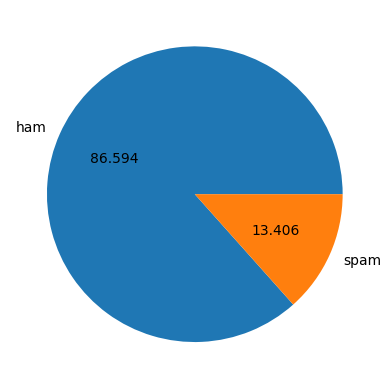

In [15]:
import matplotlib.pyplot as plt
plt.pie(df["v1"].value_counts(), labels=["ham","spam"],autopct="%0.3f")

In [20]:
df["num_characters"] = df["v2"].apply(len)
df.sample(9)

,v1,v2,num_characters
2640,0,Pandy joined 4w technologies today.he got job..,47
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136
4649,0,Finally it has happened..! Aftr decades..! BEE...,139
487,0,Dear reached railway. What happen to you,40
2959,0,Sir send to group mail check it.,32
534,0,I've not called you in a while. This is hoping...,177
1886,1,Dear 0776xxxxxxx U've been invited to XCHAT. T...,154
4075,1,87077: Kick off a new season with 2wks FREE go...,114
1676,0,"Yeah, that's fine! It's �6 to get in, is that ...",50


<Axes: xlabel='num_characters', ylabel='Count'>

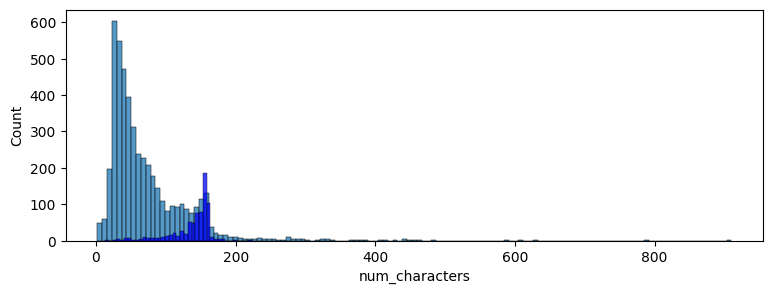

In [22]:
plt.figure(figsize=(9,3))
sns.histplot(df[df["v1"] == 0]["num_characters"])
sns.histplot(df[df["v1"] == 1]["num_characters"],color="blue")

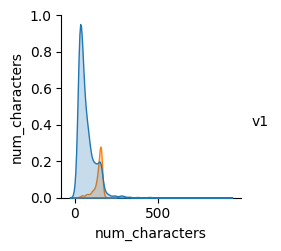

In [24]:
sns.pairplot(df,hue="v1")

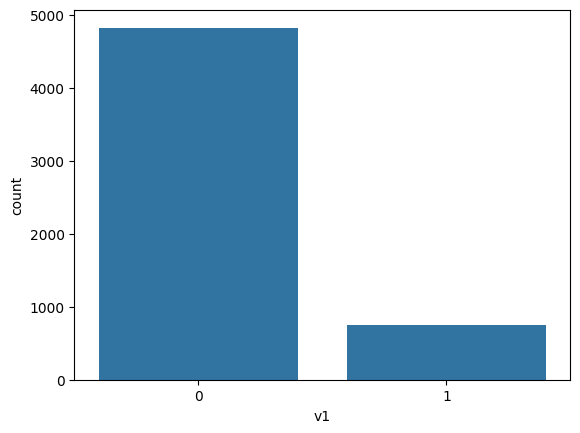

In [25]:
sns.countplot(x='v1', data=df)
plt.show()
